#  Lab 6

For this lab, we will use a shapefile of Chicago wards (https://data.cityofchicago.org/Facilities-Geographic-Boundaries/Boundaries-Wards-2015-/sp34-6z76), a KML of CTA Rail Lines (https://data.cityofchicago.org/Transportation/CTA-L-Rail-Lines-kml/sgbp-qafc), and a .csv of Chicago Business Licences already merged in the shapefile (https://data.cityofchicago.org/Community-Economic-Development/Business-Licenses-Current-Active/uupf-x98q). 

These have all been loaded to the /data part of this repository. 

Lets import our packages now:

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from pysal.viz import mapclassify
import geopandas as gpd
import matplotlib.pyplot as plt

/srv/conda/envs/notebook/lib/python3.6/site-packages/pysal/explore/segregation/network/network.py:16: UserWarning: You need pandana and urbanaccess to work with segregation's network module
You can install them with  `pip install urbanaccess pandana` or `conda install -c udst pandana urbanaccess`
  "You need pandana and urbanaccess to work with segregation's network module\n"
/srv/conda/envs/notebook/lib/python3.6/site-packages/pysal/model/spvcm/abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


Next, lets import and plot our base shapefiles using geopandas.

In [3]:
wards_df = gpd.read_file('data/bizlicencesbyward.shp')

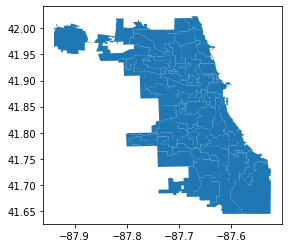

In [4]:
wards_df.plot()

In [7]:
cta_df = gpd.read_file('data/CTA_RailLines-line.shp')

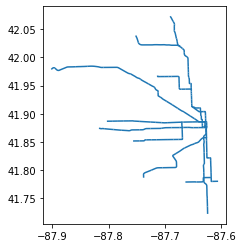

In [8]:
cta_df.plot()

If you see the above plots, the files are properly loaded! Next to the fun code part. 

Lets check out our CTA files.

In [9]:
cta_df.head()

,Name,descriptio,ASSET_ID,SHAPE.LEN,OBJECTID_1,DESCRIPT_1,LINES,ALT_LEGEND,BRANCH,TYPE,LEGEND,Field_1,geometry
0,"Red, Purple Line",None,21100002,1800.132896,2,Lawrence to Wilson,"Red, Purple Line",RDPR,Red Line North Side,Elevated or at Grade,RD,"Red, Purple Line","LINESTRING (-87.65759 41.96427, -87.65802 41.9..."
1,"Red, Purple Line",None,21100003,4256.243677,3,Wilson to Sheridan,"Red, Purple Line",RDPR,Red Line North Side,Elevated or at Grade,RD,"Red, Purple Line","LINESTRING (-87.65493 41.95377, -87.65557 41.9..."
2,"Red, Purple Line",None,21100004,2581.713736,4,Sheridan to Addison,"Red, Purple Line",RDPR,Red Line North Side,Elevated or at Grade,RD,"Red, Purple Line","LINESTRING (-87.65363 41.94743, -87.65364 41.9..."
3,"Red, Purple Line",None,21100005,1918.716686,5,Addison to Clark Junction,"Red, Purple Line",RDPR,Red Line North Side,Elevated or at Grade,RD,"Red, Purple Line","LINESTRING (-87.65345 41.94218, -87.65342 41.9..."
4,"Brown, Purple (Express), Red",None,21100007,1355.336277,7,Belmont to Wellington,"Brown, Purple (Express), Red",RPB,Red Line North Side,Elevated or at Grade,RD,"Brown, Purple (Express), Red","LINESTRING (-87.65327 41.93603, -87.65328 41.9..."


Looks like this is a collection of linestrings corresponding to station to station segments on every CTA line. ( This is pretty cool and I didn't know Chicago had that granularity on its open data)

Next, we're gonna do a spatial join between our wards and CTA lines to find which wards CTA trains intersect. Before we can do this, though, we should check CRS. 

In [10]:
cta_df.crs

{'init': 'epsg:4326'}

In [11]:
wards_df.crs

{'init': 'epsg:4326'}

Yeet. This means we can move on to the next stop of performing an inner join with our wards and CTA lines

In [12]:
train_wards = gpd.sjoin(wards_df, cta_df, how='inner', op='intersects')

train_wards.head()

,shape_area,shape_leng,ward,AGG_COUNT,geometry,index_right,Name,descriptio,ASSET_ID,SHAPE.LEN,OBJECTID_1,DESCRIPT_1,LINES,ALT_LEGEND,BRANCH,TYPE,LEGEND,Field_1
0,1.160965e+08,93073.340838,12,1064.0,"POLYGON ((-87.69623 41.85755, -87.69625 41.857...",75,Orange Line,None,21100133,11059.722418,124,Western to 35th/Archer,Orange Line,OR,Orange Line,Elevated or at Grade,OR,Orange Line
2,6.558830e+07,82183.694820,15,524.0,"POLYGON ((-87.69818 41.81729, -87.69817 41.817...",75,Orange Line,None,21100133,11059.722418,124,Western to 35th/Archer,Orange Line,OR,Orange Line,Elevated or at Grade,OR,Orange Line
0,1.160965e+08,93073.340838,12,1064.0,"POLYGON ((-87.69623 41.85755, -87.69625 41.857...",108,Orange Line,None,21100134,5489.062925,125,35th/Archer to Ashland,Orange Line,OR,Orange Line,Elevated or at Grade,OR,Orange Line
25,1.247347e+08,105358.092147,25,1821.0,"POLYGON ((-87.64972 41.88268, -87.64972 41.882...",108,Orange Line,None,21100134,5489.062925,125,35th/Archer to Ashland,Orange Line,OR,Orange Line,Elevated or at Grade,OR,Orange Line
0,1.160965e+08,93073.340838,12,1064.0,"POLYGON ((-87.69623 41.85755, -87.69625 41.857...",124,Pink Line,None,21100144,2889.800448,143,Kedzie to California,Pink Line,PK,Pink Line,Elevated or at Grade,PK,Pink Line


This has a similar issue to the lab in which the intersection increases the observation count for our polygons

In [14]:
geoids = wards_df['ward'].values
ward_hw = np.array([geoid in train_wards['ward'].values for geoid in geoids])

ward_hw

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True,  True, False,  True,  True,  True,  True, False,
       False,  True, False, False,  True, False,  True, False,  True,
       False,  True,  True,  True,  True, False, False, False,  True,
        True, False,  True, False,  True])

In [15]:
wards_df['intersectshw'] = ward_hw*1.

We have thus created the dummy variable and have mapped it back to the original wards shapefile to represent intersections

In [25]:
wards_df.head()

,shape_area,shape_leng,ward,AGG_COUNT,geometry,intersectshw
0,1.160965e+08,93073.340838,12,1064.0,"POLYGON ((-87.69623 41.85755, -87.69625 41.857...",1.0
1,1.031436e+08,97901.323833,16,632.0,"POLYGON ((-87.66289 41.79884, -87.66289 41.798...",1.0
2,6.558830e+07,82183.694820,15,524.0,"POLYGON ((-87.69818 41.81729, -87.69817 41.817...",1.0
3,1.372904e+08,90105.195619,20,493.0,"POLYGON ((-87.65524 41.80883, -87.65524 41.808...",1.0
4,4.973346e+07,38122.692826,49,643.0,"POLYGON ((-87.66420 42.02126, -87.66419 42.021...",1.0


We can now use geopandas mapping visualization tools to show this:

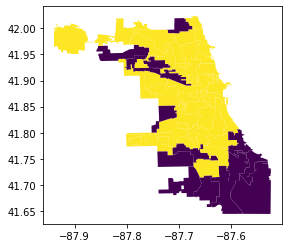

In [31]:
wards_df.plot(column='intersectshw', scheme='EQUALINTERVAL')

Yellow areas intersect at least one CTA line, purple areas do not.

Next, we can use pyplot to take a chloropleth map of our wards by the total number of business licences within. This was previously added in GEODA. 

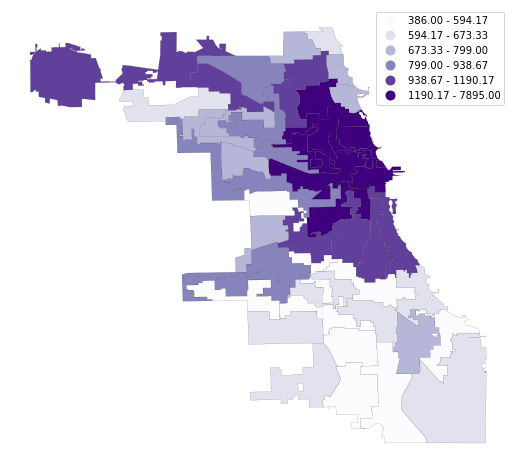

In [35]:
import matplotlib.pyplot as plt 

f, ax = plt.subplots(1, figsize=(9, 9))
wards_df.plot(column='AGG_COUNT', scheme='QUANTILES', \
        k=6, cmap='Purples', linewidth=0.1, ax=ax, \
        edgecolor='black', legend=True)
ax.set_axis_off()
plt.show()